In [319]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
#importing data
taxi_df = pd.read_csv(r"C:\Users\PC\Desktop\Oluwatobi\Data Analytics Project\Python'\Green Taxi\green_tripdata_2015-09.csv")
taxi_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [321]:
taxi_df.shape

(1494926, 21)

- the dataset has 1494926 rows and 21 columns

In [323]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1494926 non-null  int64  
 1   lpep_pickup_datetime   1494926 non-null  object 
 2   Lpep_dropoff_datetime  1494926 non-null  object 
 3   Store_and_fwd_flag     1494926 non-null  object 
 4   RateCodeID             1494926 non-null  int64  
 5   Pickup_longitude       1494926 non-null  float64
 6   Pickup_latitude        1494926 non-null  float64
 7   Dropoff_longitude      1494926 non-null  float64
 8   Dropoff_latitude       1494926 non-null  float64
 9   Passenger_count        1494926 non-null  int64  
 10  Trip_distance          1494926 non-null  float64
 11  Fare_amount            1494926 non-null  float64
 12  Extra                  1494926 non-null  float64
 13  MTA_tax                1494926 non-null  float64
 14  Tip_amount        

In [324]:
#drop columns
taxi_df.drop(['Store_and_fwd_flag','Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount', 'Tolls_amount','Tolls_amount', 'Ehail_fee','improvement_surcharge'  ],axis = 'columns', inplace = True)

In [325]:
taxi_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,6.30,2,1.0


#### Data Cleaning & Transformation

In [327]:
# convert pickup and drop off columns to datetime format

taxi_df['lpep_pickup_datetime'] = pd.to_datetime(taxi_df['lpep_pickup_datetime'])
taxi_df['Lpep_dropoff_datetime'] = pd.to_datetime(taxi_df['Lpep_dropoff_datetime'])

# Calculate trip duration in minutes
taxi_df['trip_duration_minutes'] = (taxi_df['Lpep_dropoff_datetime'] - taxi_df['lpep_pickup_datetime']).dt.total_seconds() / 60

#extract hour from pickup_datetime
taxi_df['pickup_hour'] = taxi_df['lpep_pickup_datetime'].dt.hour

#extract date from pickup_datetime
taxi_df['pickup_date'] = taxi_df['lpep_pickup_datetime'].dt.date

#extract dayname from pickup_datetime
taxi_df['day_name'] = taxi_df['lpep_pickup_datetime'].dt.day_name()
taxi_df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Total_amount,Payment_type,Trip_type,trip_duration_minutes,pickup_hour,pickup_date,day_name
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,9.75,1,2.0,0.066667,0,2015-09-01,Tuesday
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.00,1,2.0,0.066667,0,2015-09-01,Tuesday
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,5.80,1,1.0,2.566667,0,2015-09-01,Tuesday
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,6.30,2,1.0,4.100000,0,2015-09-01,Tuesday
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,6.30,2,1.0,4.100000,0,2015-09-01,Tuesday


In [328]:
#drop columns
taxi_df.drop([ 'Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude' ], axis = 'columns', inplace = True)
taxi_df.head()

,VendorID,lpep_pickup_datetime,RateCodeID,Passenger_count,Trip_distance,Total_amount,Payment_type,Trip_type,trip_duration_minutes,pickup_hour,pickup_date,day_name
0,2,2015-09-01 00:02:34,5,1,0.00,9.75,1,2.0,0.066667,0,2015-09-01,Tuesday
1,2,2015-09-01 00:04:20,5,1,0.00,45.00,1,2.0,0.066667,0,2015-09-01,Tuesday
2,2,2015-09-01 00:01:50,1,1,0.59,5.80,1,1.0,2.566667,0,2015-09-01,Tuesday
3,2,2015-09-01 00:02:36,1,1,0.74,6.30,2,1.0,4.100000,0,2015-09-01,Tuesday
4,2,2015-09-01 00:00:14,1,1,0.61,6.30,2,1.0,4.100000,0,2015-09-01,Tuesday


In [329]:
#find and replace codes with values
taxi_df['VendorID'] = taxi_df['VendorID'].replace({1:' Creative Mobile Technologies, LLC',2: ' Curb Mobility, LLC'})
taxi_df['RateCodeID'] = taxi_df['RateCodeID'].replace({1:'Standard rate',2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride', 99: 'Null/unknown'})
taxi_df['Payment_type'] = taxi_df['Payment_type'].replace({0:'Flex Fare trip', 1: 'Credit Card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown'})
taxi_df['Trip_type '] = taxi_df['Trip_type '].replace({1: 'Steet-hail', 2: 'Dispatch'})
taxi_df.head()

,VendorID,lpep_pickup_datetime,RateCodeID,Passenger_count,Trip_distance,Total_amount,Payment_type,Trip_type,trip_duration_minutes,pickup_hour,pickup_date,day_name
0,"Curb Mobility, LLC",2015-09-01 00:02:34,Negotiated fare,1,0.00,9.75,Credit Card,Dispatch,0.066667,0,2015-09-01,Tuesday
1,"Curb Mobility, LLC",2015-09-01 00:04:20,Negotiated fare,1,0.00,45.00,Credit Card,Dispatch,0.066667,0,2015-09-01,Tuesday
2,"Curb Mobility, LLC",2015-09-01 00:01:50,Standard rate,1,0.59,5.80,Credit Card,Steet-hail,2.566667,0,2015-09-01,Tuesday
3,"Curb Mobility, LLC",2015-09-01 00:02:36,Standard rate,1,0.74,6.30,Cash,Steet-hail,4.100000,0,2015-09-01,Tuesday
4,"Curb Mobility, LLC",2015-09-01 00:00:14,Standard rate,1,0.61,6.30,Cash,Steet-hail,4.100000,0,2015-09-01,Tuesday


#### Data Analysis & Visualization

In [331]:
#how many trips in total were recorded in Sept, 2025 for the Green taxis?
total = taxi_df.shape[0]
print(f" Total trips: {total}")

#What's the average passenger count per trip?
avg_pass_count = taxi_df['Passenger_count'].mean()
print(f" Average passenger count: {avg_pass_count:.1f}")

#What's the average trip distance?
avg_trip_distance = taxi_df['Trip_distance'].mean()
print(f" Average trip distance: {avg_trip_distance:.2f}miles")

#What's the average amount per trip?
avg_trip_amount = taxi_df['Total_amount'].mean()
print(f" Average trip amount: {avg_trip_amount:.2f}USD")

#What's the average trip duration(min)?
avg_trip_duration = taxi_df['trip_duration_minutes'].mean()
print(f" Average trip duration: {avg_trip_duration:.2f}min")

 Total trips: 1494926
 Average passenger count: 1.4
 Average trip distance: 2.97miles
 Average trip amount: 15.03USD
 Average trip duration: 20.26min


In [332]:
#trips by hour
taxi_df.groupby(['pickup_hour'])['pickup_hour'].count()

pickup_hour
0     67158
1     53773
2     41196
3     31640
4     26424
5     16700
6     22667
7     41978
8     58965
9     62027
10    57468
11    56791
12    57828
13    57477
14    66664
15    73777
16    79157
17    88022
18    97245
19    96141
20    90785
21    86543
22    84705
23    79795
Name: pickup_hour, dtype: int64

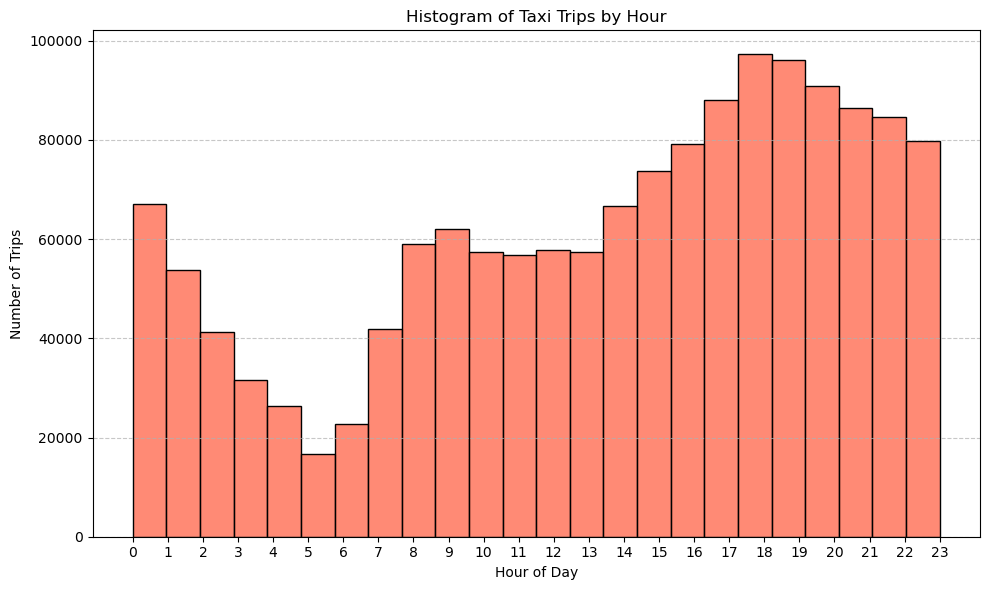

In [333]:
#trip by hour histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=taxi_df, x='pickup_hour', bins=24, kde=False, color='tomato', edgecolor='black')
plt.title('Histogram of Taxi Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [334]:
#trips by vendors
taxi_df.groupby(['VendorID'])['VendorID'].count()

VendorID
Creative Mobile Technologies, LLC     325827
Curb Mobility, LLC                   1169099
Name: VendorID, dtype: int64

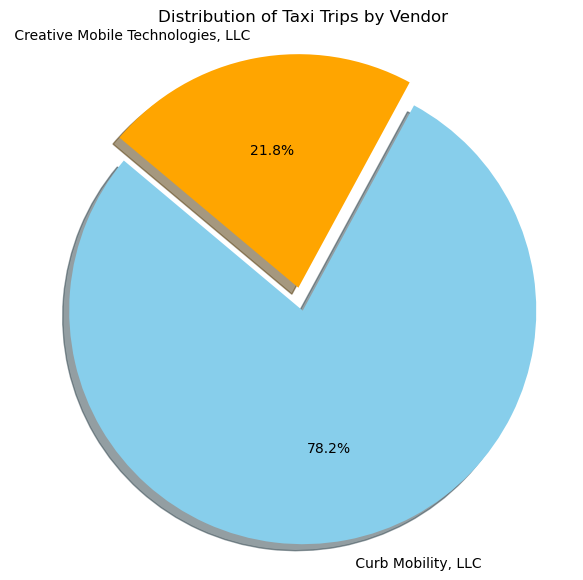

In [368]:
#trips by vendors piechart

# Count number of trips per vendor
vendor_counts = taxi_df['VendorID'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(vendor_counts, 
        labels=vendor_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['skyblue', 'orange'], 
        shadow=True, 
        explode=[0.05]*len(vendor_counts))

plt.title('Distribution of Taxi Trips by Vendor')
plt.axis('equal')  
plt.show()


In [337]:
#trips by Payment type
taxi_df.groupby(['Payment_type'])['Payment_type'].count()

Payment_type
Cash           783699
Credit Card    701287
Dispute          4368
No charge        5498
Unknown            74
Name: Payment_type, dtype: int64

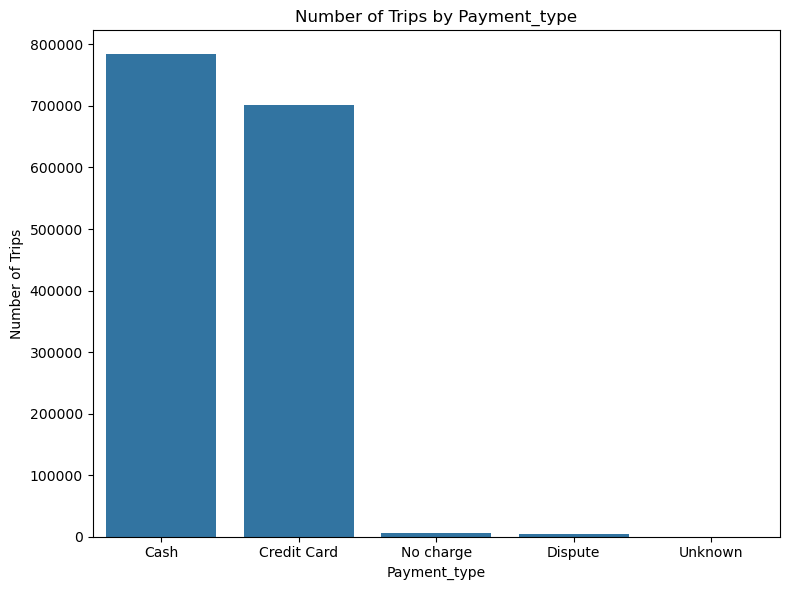

In [338]:
#trips by Payment type barchart

# Count trips by PaymentPayment
ratecode_counts = taxi_df['Payment_type'].value_counts().reset_index()
ratecode_counts.columns = ['Payment_type', 'Number of Trips']

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment_type', y='Number of Trips', data=ratecode_counts)

# Title and labels
plt.title('Number of Trips by Payment_type')
plt.xlabel('Payment_type')
plt.ylabel('Number of Trips')

# Display the plot
plt.tight_layout()
plt.show()


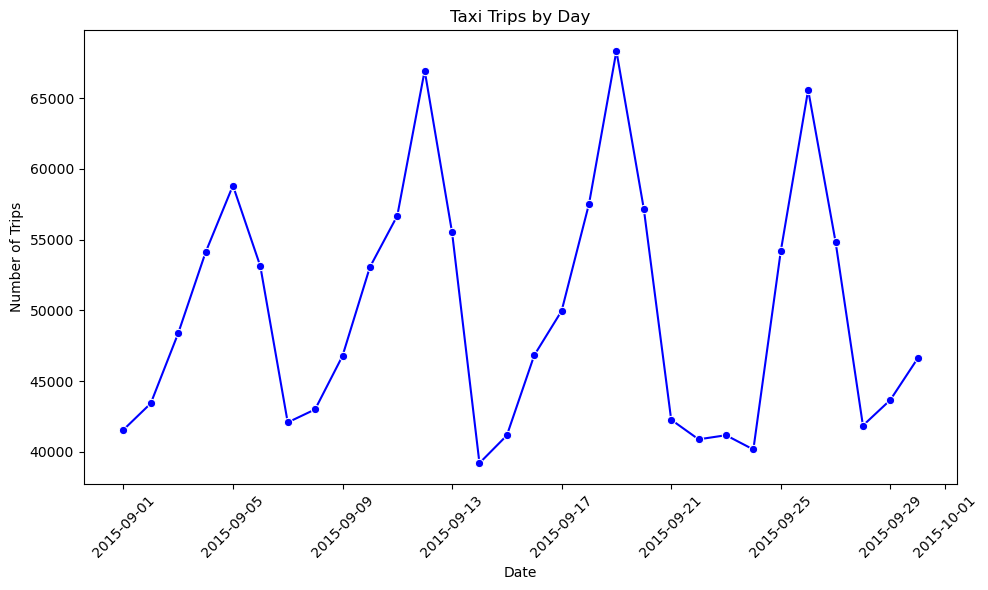

In [340]:
# Group by pickup_date and count the number of trips
daily_trips = taxi_df.groupby('pickup_date').size().reset_index(name='trip_count')

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_date', y='trip_count', data=daily_trips, marker='o', color='b')
plt.title('Taxi Trips by Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [366]:
#trips by weekdays and hours
heatmap_data = taxi_df.groupby(['day_name', 'pickup_hour']).size().unstack(fill_value=0)
heatmap_data

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,7906,5871,3944,2817,2404,1848,3290,6836,9401,9502,...,9277,10548,11730,13363,15273,15579,14949,15020,15687,16211
Monday,7385,5332,3779,2921,2766,2108,3053,5561,7776,7825,...,7797,8675,9020,10066,11142,10589,9619,8726,7971,6680
Saturday,15636,13889,11815,9376,7071,3512,3066,3704,5036,6735,...,10475,11651,12543,13741,14879,16007,15819,15657,16617,17413
Sunday,16596,15175,13076,10372,8187,3919,2904,2908,3697,5221,...,9429,10654,11056,11478,11842,11619,10998,10488,10346,9719
Thursday,6557,4352,2801,2090,1954,1606,3124,6675,9535,9501,...,8926,9628,10197,12176,13750,13068,12548,11520,10716,9972
Tuesday,6341,4264,2748,1906,1997,1876,3512,7806,11373,11154,...,10077,11147,11978,13267,14879,14229,12873,11985,11102,9293
Wednesday,6737,4890,3033,2158,2045,1831,3718,8488,12147,12089,...,10683,11474,12633,13931,15480,15050,13979,13147,12266,10507


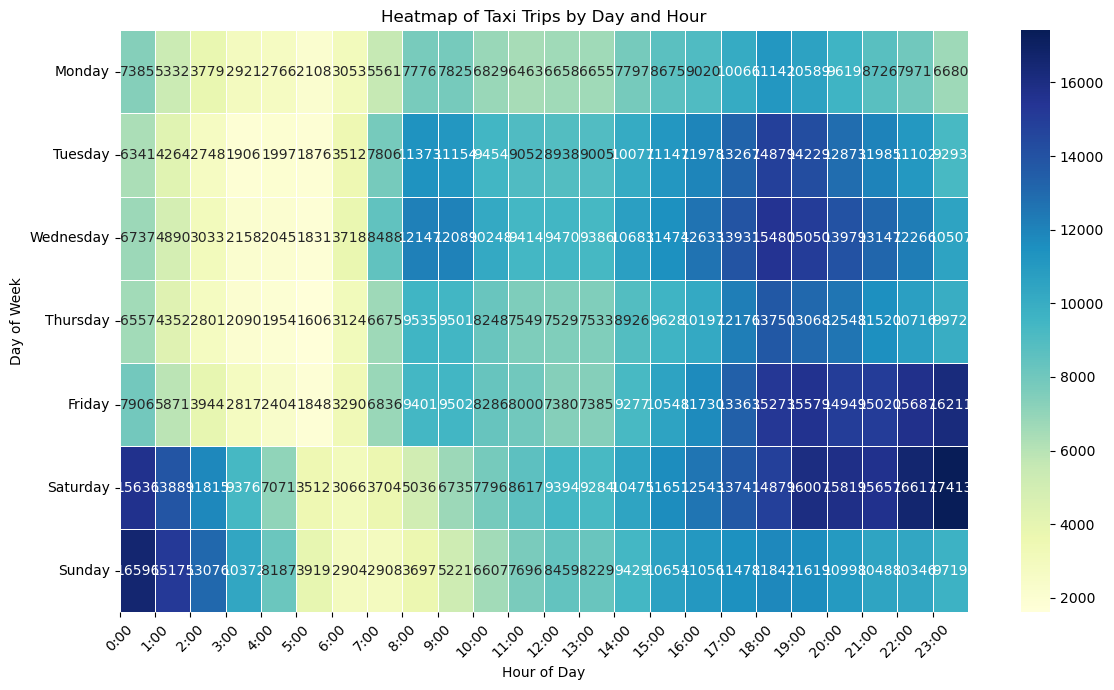

In [342]:

# Reorder the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title('Heatmap of Taxi Trips by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
